# Section 1 : Submitters

**Submitters:
Yael Avraham,ID : 206656589 ,
Eden Fabrikant, ID: 212302541**


Kaggle link:
https://www.kaggle.com/yaelavraham

# Section 2 : Overview

In this project we aim to predict and classify whether a passenger survived the Titanic disaster, using the dataset -**Titanic - Machine Learning from Disaster** from Kaggle.

We will use a **Logistic Regression** model to perform our predictions. Our workflow includes data exploration, processing of the data, statistical analyses, training the model, and evaluating its performance.

# Section 3 : Imports and Definitions

In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

# Section 4 : Mount to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Path to the new folder inside my google drive
folder_path = '/content/drive/My Drive/titanic ML'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Section 5 : Data Investigation and Preprocessing

We use the following data set https://www.kaggle.com/c/titanic/data

Now we will upload our data set and display it.

In [4]:
#uploading the data
train_path = '/content/drive/My Drive/titanic ML/train.csv'
test_path = '/content/drive/My Drive/titanic ML/test.csv'

train_df = pd.read_csv(train_path)
train_df_f = pd.read_csv(train_path)
test_df_f = pd.read_csv(test_path)

#display
print("Train display:")
display(train_df)
print("Test display:")
display(test_df_f)

Train display:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Test display:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Unique value count

In [6]:
unique_counts = train_df.nunique().sort_values(ascending=False)
display(unique_counts.to_frame(name='Unique Values'))

,Unique Values
PassengerId,891
Name,891
Ticket,681
Fare,248
Cabin,147
Age,88
SibSp,7
Parch,7
Embarked,3
Pclass,3


We can inffer that 'Name' wil cause as much overfitting as 'PassengerId'. So is 'Ticket'.

Searching for missing data

In [7]:
# Show only the columns that actually have NaNs
train_df.isna().sum()[train_df.isna().sum() > 0]

,0
Age,177
Cabin,687
Embarked,2


In [8]:
# Percentege
missing_percent = train_df.isnull().mean() * 100

# Top 20 with most missing values
top_missing = missing_percent.sort_values(ascending=False).head(5)

# Table
top_missing_df = top_missing.reset_index()
top_missing_df.columns = ['Feature', 'MissingPercentage']

display(top_missing_df)


,Feature,MissingPercentage
0,Cabin,77.104377
1,Age,19.865320
2,Embarked,0.224467
3,PassengerId,0.000000
4,Name,0.000000


'Cabin'- 77% of records are missing, which means that imputing information and using this variable for prediction will be considered carefully.

'Age'- There are 20% missing value.
we will be consider filling values or further engineering

'Embarked'- There are only 0.2% of missing value.
we will probably drop them to avoid noise.

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Section 6 : Data Visualization & conclusions

we want to show the behavior of the features.

Since we our features are limited, we want to get as much information as we can from the data we have.

Now we will go through each feature to dictate their behaviour and contribution to the model.

As for **'PassengerId'** - this feature will not be considered due to overfitting.

As for **'Name'** - this feature will be simplified in order to come to conclusions.

As for **'Cabin'** - this feature will be probably dropped due to the percentage of missing information.

we will further investigate the other features.

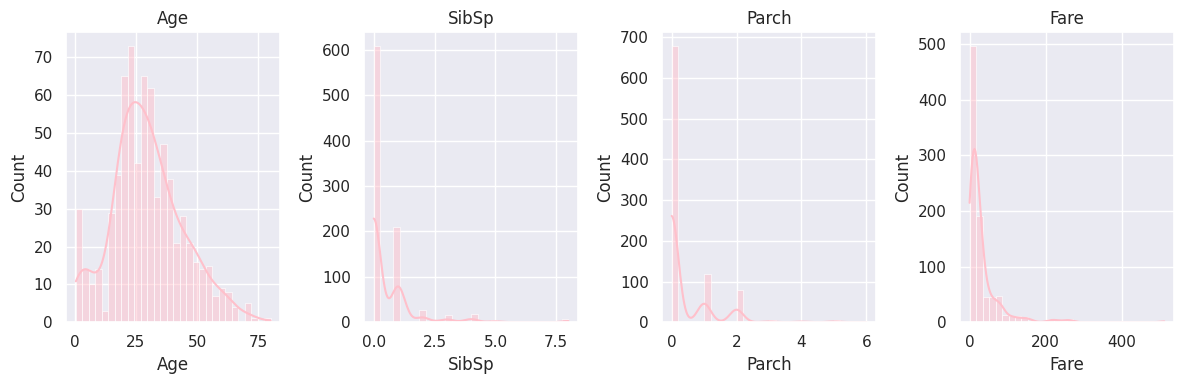

In [10]:
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Pclass','Sex','Ticket','Embarked']]

sns.set_theme()
ncols = 4

#Histograms for numerical features
num_cols = df_num.columns
nrows = (len(num_cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df_num, x=col, kde=True, bins=30, ax=axes[i], color='pink')
    axes[i].set_title(f'{col}', fontsize=12)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that 'Age' is right skewed, therfore we will check which one of mean and median will be best for the missing values.

The other features may need to be normaized.
Parch and SibSp have quite a lot  of 0 values.
we will further examinee their actual impact.

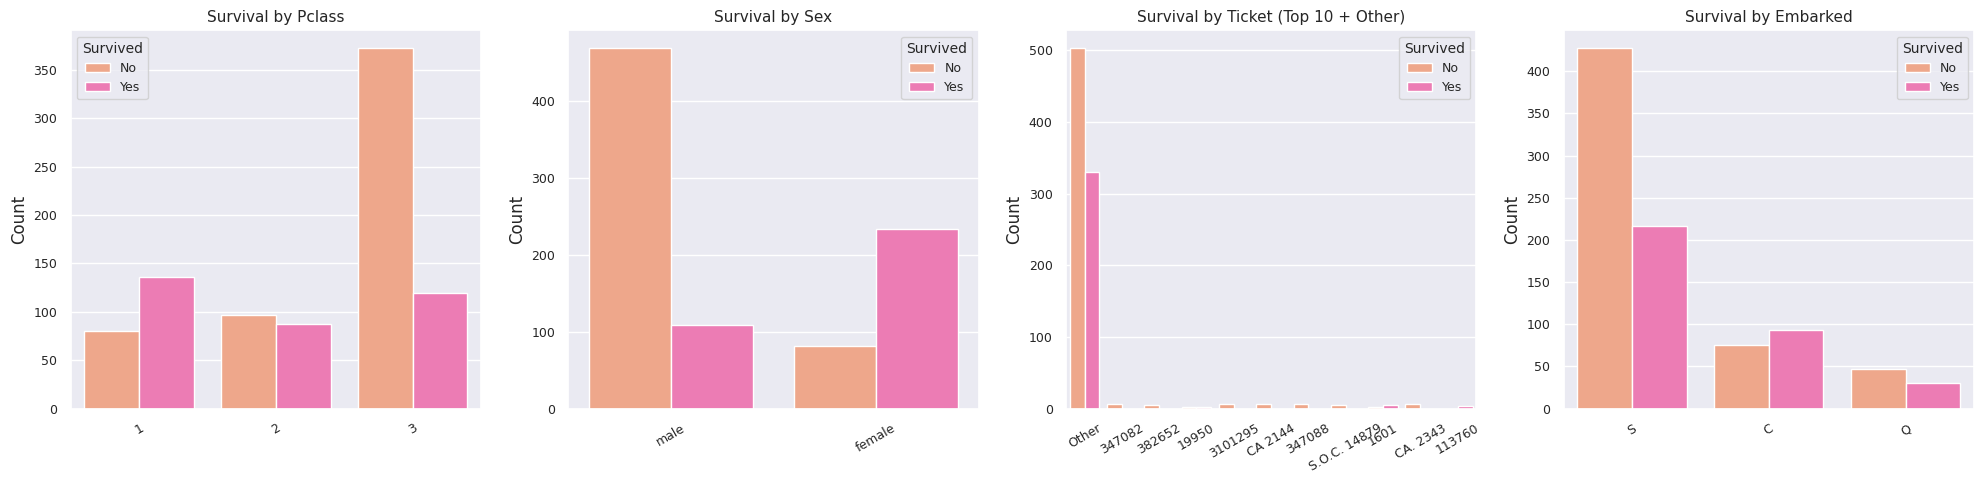

In [11]:
df_plot = train_df.copy()

top_tickets = df_plot['Ticket'].value_counts().nlargest(10).index
df_plot['Ticket_grouped'] = df_plot['Ticket'].apply(lambda x: x if x in top_tickets else 'Other')

features = ['Pclass', 'Sex', 'Ticket_grouped', 'Embarked']
titles = ['Pclass', 'Sex', 'Ticket (Top 10 + Other)', 'Embarked']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, feature in enumerate(features):
    sns.countplot(data=df_plot, x=feature, hue='Survived',
                  palette=['#FFA07A', '#FF69B4'], ax=axes[i])
    axes[i].set_title(f'Survival by {titles[i]}', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=30, labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].legend(title='Survived', labels=['No', 'Yes'], fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()



As we can see, **'ticket'** may harm the model.



We will consider feature engineering.

It shows that first **class** is the safest, also passengers who boarded in Queenstown (**'Embarked'**), appear to have the highest survival rate.

**'sex'** suggests that women are more likely to survive than men.

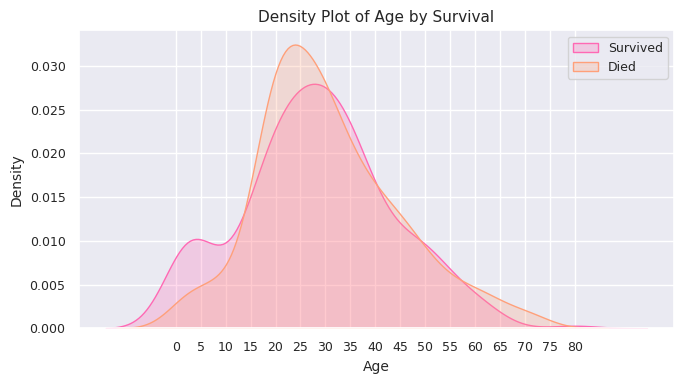

In [12]:
plt.figure(figsize=(7, 4))
sns.kdeplot(data=train_df[train_df['Survived'] == 1], x='Age', fill=True, label='Survived', color='#FF69B4')
sns.kdeplot(data=train_df[train_df['Survived'] == 0], x='Age', fill=True, label='Died', color='#FFA07A')

plt.title('Density Plot of Age by Survival', fontsize=11)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(ticks=np.arange(0, 85, 5), fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


  We can see that the distribution of whether the person survived or died through **age** is quite similar except for children.
  
  They have more chance surviving.

  Therfore a strong column to consider adding is 'is_minor' for the age of under 16.



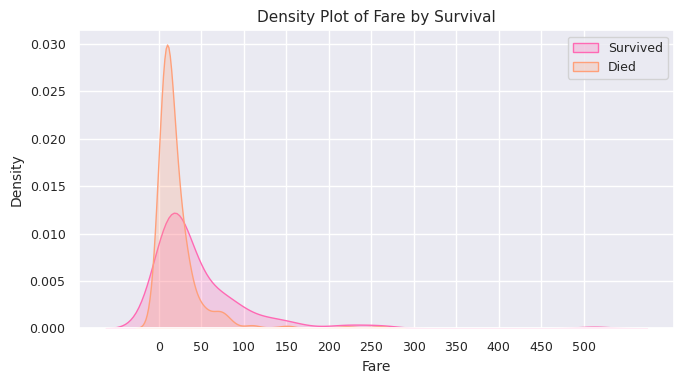

In [13]:
plt.figure(figsize=(7, 4))

sns.kdeplot(data=train_df[train_df['Survived'] == 1], x='Fare', fill=True, label='Survived', color='#FF69B4')
sns.kdeplot(data=train_df[train_df['Survived'] == 0], x='Fare', fill=True, label='Died', color='#FFA07A')

plt.title('Density Plot of Fare by Survival', fontsize=11)
plt.xlabel('Fare', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(ticks=np.arange(0, 550, 50), fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()


We can inffer that low **fare** had a strong correlation to who had died, meaning it is an important feature for our model.

Let's explore **'SibSp'** and **'Parch'**.

We will now see if having a family member is crucial in surviving.

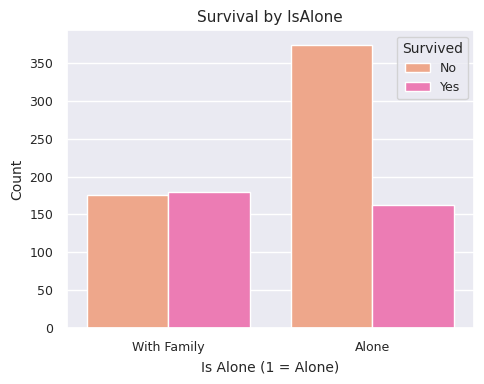

In [14]:

train_df['FamilyMembers'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone'] = (train_df['FamilyMembers'] == 0).astype(int)

plt.figure(figsize=(5, 4))
sns.countplot(data=train_df, x='IsAlone', hue='Survived', palette=['#FFA07A', '#FF69B4'])

plt.title('Survival by IsAlone', fontsize=11)
plt.xlabel('Is Alone (1 = Alone)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(ticks=[0,1], labels=['With Family', 'Alone'], fontsize=9)
plt.yticks(fontsize=9)
plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()


As we can see, the people who where alone had less chance of surviving, meaning **'is_alone'** is an important data for the model.

In [15]:
if 'IsAlone' in train_df.columns:
    train_df.drop('IsAlone', axis=1, inplace=True)


# Section 7 : Feature engineering

1. Simplifing **'Name'**- concidering only Name's titles such as mr, ms, master ect.
2. Adding **'is_minor'** column as we saw it is crucial in surviving.
3. Adding **'is_alone'** column as we saw it is crucial in surviving.

1.

In [16]:
# extracting Name
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# merging rare titles
train_df['Title'] = train_df['Title'].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

# deleting Name
train_df.drop('Name', axis=1, inplace=True)


Checking 'title' affect

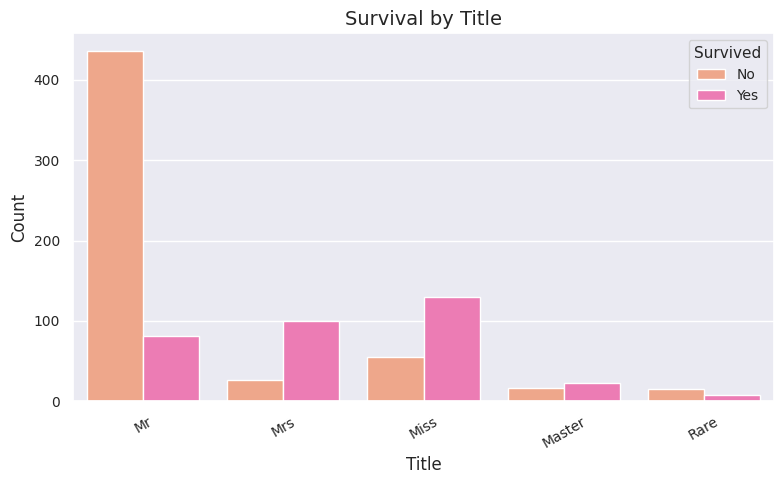

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Title', hue='Survived', palette=['#FFA07A', '#FF69B4'])

plt.title('Survival by Title', fontsize=14)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


As expected, Mrs and Miss had more chance surviving rather than Mr and Master.

2.

In [18]:
#IsMinor
train_df['is_minor'] = (train_df['Age'] <= 16).astype(int)

Checking 'is_minor' affect

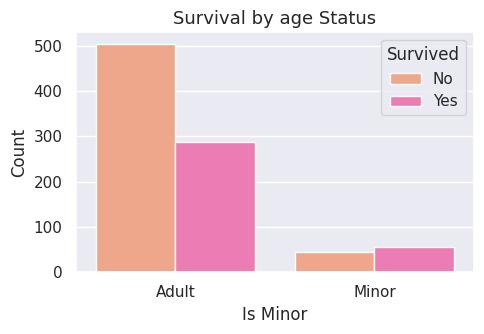

In [19]:
plt.figure(figsize=(5, 3.5))

sns.countplot(data=train_df, x='is_minor', hue='Survived', palette=['#FFA07A', '#FF69B4'])

plt.title('Survival by age Status', fontsize=13)
plt.xlabel('Is Minor', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(ticks=[0, 1], labels=['Adult', 'Minor'], fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=11, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()


As we can see, being a minor has more chance surviving than being an adult.

note: we will handle missing values here by filling nan values as 0 (adult) since the median and the mean are both adult.

3.

In [20]:
train_df['FamilyMembers'] = train_df['SibSp'] + train_df['Parch']

train_df['is_alone'] = (train_df['FamilyMembers'] == 0).astype(int)
train_df.drop('FamilyMembers', axis=1, inplace=True)

## section 7.1: Correlation matrix

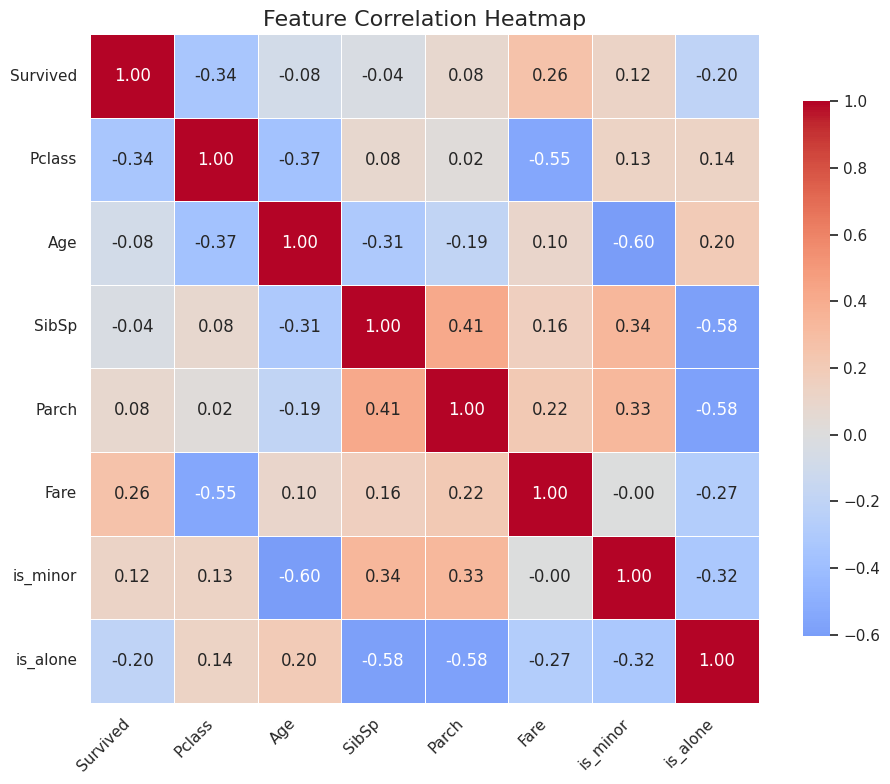

In [21]:
#dropping irrelevant features
train_df.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

corr = train_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


It seems that 'SibSp' and 'Parch' might not be helpful for our model as suspected, therfore we will investigate how they affect the model.

# Section 8 : Data processing

dropping irrelevant columns:

In [22]:
train_df.drop(['Ticket'], axis=1, inplace=True)

In [23]:
display(train_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,is_minor,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Mr,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,0,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,0,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rare,0,1
887,1,1,female,19.0,0,0,30.0000,S,Miss,0,1
888,0,3,female,NaN,1,2,23.4500,S,Miss,0,0
889,1,1,male,26.0,0,0,30.0000,C,Mr,0,1


removing the only 2 values of 'Embarked' to avoid noise:

In [24]:
train_df = train_df.dropna(subset=['Embarked'])

## Section 8.1 : validation part

### Section 8.1.1 : Checking how to fill in 'Age' missing values

Since the **Age** factor played a crucial role in surviving in the titanic, and we have seen how important it is it the data visualization, we will fill the missing values in that column.

Using median:

In [25]:
#Completion by median
train_median_age = train_df.copy()
train_median_age['Age'] = train_median_age['Age'].fillna(train_median_age['Age'].median())

In [26]:
#one hot encoding

train_encoded_1 = pd.get_dummies(train_median_age,
                               columns=['Sex', 'Embarked', 'Title', 'Pclass', 'is_minor', 'is_alone'],
                               drop_first=False)


In [27]:
display(train_encoded_1.head(8))

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,is_minor_0,is_minor_1,is_alone_0,is_alone_1
0,0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,True,False
1,1,38.0,1,0,71.2833,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,True,False
2,1,26.0,0,0,7.9250,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False
4,0,35.0,0,0,8.0500,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True
5,0,28.0,0,0,8.4583,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False,True
6,0,54.0,0,0,51.8625,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
7,0,2.0,3,1,21.0750,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,True,False


In [28]:
#splitting for temporary train and validation

X_1 = train_encoded_1.drop('Survived', axis=1)
y_1 = train_encoded_1['Survived']

temp_train_1, temp_val_1, y_train_1, y_val_1 = train_test_split(
    X_1, y_1, test_size=0.2, random_state=42, stratify=y_1
)


In [29]:
#Normalizing the relevant columns

X_train_scaled_1 = temp_train_1.copy()
X_val_scaled_1 = temp_val_1.copy()

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
X_train_scaled_1[num_cols] = scaler.fit_transform(temp_train_1[num_cols])
X_val_scaled_1[num_cols] = scaler.transform(temp_val_1[num_cols])


In [30]:
# running the model

#creating the model
log_model_1 = LogisticRegression(max_iter=1000, solver='liblinear')

#training
log_model_1.fit(temp_train_1, y_train_1)


LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
#prediction

y_pred_1 = log_model_1.predict(temp_val_1)
y_proba_1 = log_model_1.predict_proba(temp_val_1)[:, 1]

y_train_pred_1 = log_model_1.predict(temp_train_1)

Train Accuracy: 0.8340
Validation Accuracy: 0.8202
Train Cross Entropy: 0.4102
Validation Cross Entropy: 0.4130
AUC: 0.8727

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.74        68

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



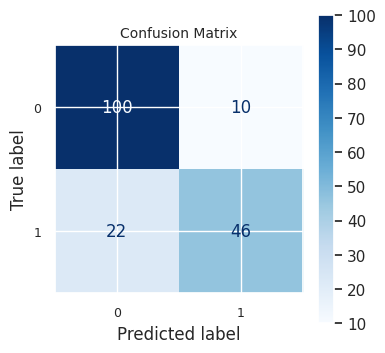

In [32]:
#KPI

#accuracy

train_accuracy1 = accuracy_score(y_train_1, y_train_pred_1)
val_accuracy1 = accuracy_score(y_val_1, y_pred_1)

print(f"Train Accuracy: {train_accuracy1:.4f}")
print(f"Validation Accuracy: {val_accuracy1:.4f}")

# Cross Entropy (Log Loss)
ce_train1 = log_loss(y_train_1, log_model_1.predict_proba(temp_train_1))
ce_val1 = log_loss(y_val_1, y_proba_1)

print(f"Train Cross Entropy: {ce_train1:.4f}")
print(f"Validation Cross Entropy: {ce_val1:.4f}")

# AUC
auc1 = roc_auc_score(y_val_1, y_proba_1)
print(f"AUC: {auc1:.4f}")

print("\nClassification Report:")
print(classification_report(y_val_1, y_pred_1))

#confusion_matrix
cm1 = confusion_matrix(y_val_1, y_pred_1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_model_1.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp1.plot(cmap='Blues', ax=ax)

plt.title("Confusion Matrix", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()


We can see we can make improvment for the recall of class 1 (improving FN).

Loss vs Epochs

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


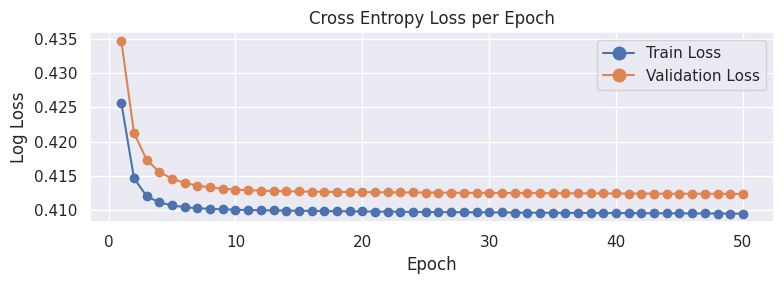

In [33]:
df = train_encoded_1.copy()
X = df.drop('Survived', axis=1)
y = df['Survived']

# splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# model
clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

#epochs
train_losses = []
val_losses = []

epochs = 50
for epoch in range(epochs):
    clf.max_iter = 1
    clf.fit(X_train_scaled, y_train)

    # pred
    y_train_proba = clf.predict_proba(X_train_scaled)
    y_val_proba = clf.predict_proba(X_val_scaled)

    # log loss
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
# graph
plt.figure(figsize=(8, 3))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.title("Cross Entropy Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Using mean:

In [34]:
#Completion by mean
train_mean_age = train_df.copy()
train_mean_age['Age'] = train_mean_age['Age'].fillna(train_mean_age['Age'].mean())

In [35]:
#one hot encoding

train_encoded_2 = pd.get_dummies(train_mean_age,
                               columns=['Sex', 'Embarked', 'Title', 'Pclass', 'is_minor', 'is_alone'],
                               drop_first=False)


In [36]:
display(train_encoded_2.head(8))

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,is_minor_0,is_minor_1,is_alone_0,is_alone_1
0,0,22.000000,1,0,7.2500,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,True,False
1,1,38.000000,1,0,71.2833,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,True,False
2,1,26.000000,0,0,7.9250,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False
4,0,35.000000,0,0,8.0500,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True
5,0,29.642093,0,0,8.4583,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False,True
6,0,54.000000,0,0,51.8625,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
7,0,2.000000,3,1,21.0750,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,True,False


In [37]:
#splitting for temporary train and validation

X_2 = train_encoded_2.drop('Survived', axis=1)
y_2 = train_encoded_2['Survived']

temp_train_2, temp_val_2, y_train_2, y_val_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42, stratify=y_2
)

In [38]:
#Normalizing the relevant columns

X_train_scaled_2 = temp_train_2.copy()
X_val_scaled_2 = temp_val_2.copy()

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
X_train_scaled_2[num_cols] = scaler.fit_transform(temp_train_2[num_cols])
X_val_scaled_2[num_cols] = scaler.transform(temp_val_2[num_cols])


In [39]:
# running the model

#creating the model
log_model_2 = LogisticRegression(max_iter=1000, solver='liblinear')

#training
log_model_2.fit(temp_train_2, y_train_2)


LogisticRegression(max_iter=1000, solver='liblinear')

In [40]:
#prediction

y_pred_2 = log_model_2.predict(temp_val_2)
y_proba_2 = log_model_2.predict_proba(temp_val_2)[:, 1]

# חיזוי על סט האימון
y_train_pred_2 = log_model_2.predict(temp_train_2)

Train Accuracy: 0.8340
Validation Accuracy: 0.8202
Train Cross Entropy: 0.4101
Validation Cross Entropy: 0.4128
AUC: 0.8724

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.74        68

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



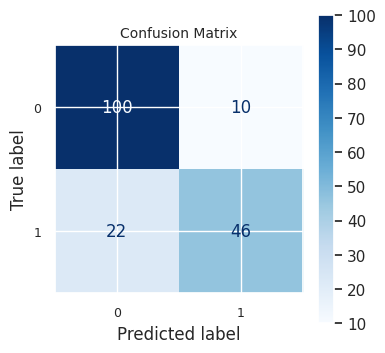

In [41]:
#KPI

#accuracy

train_accuracy2 = accuracy_score(y_train_2, y_train_pred_2)
val_accuracy2 = accuracy_score(y_val_2, y_pred_2)

print(f"Train Accuracy: {train_accuracy2:.4f}")
print(f"Validation Accuracy: {val_accuracy2:.4f}")

# Cross Entropy (Log Loss)
ce_train2 = log_loss(y_train_2, log_model_2.predict_proba(temp_train_2))
ce_val2 = log_loss(y_val_2, y_proba_2)

print(f"Train Cross Entropy: {ce_train2:.4f}")
print(f"Validation Cross Entropy: {ce_val2:.4f}")

# AUC
auc2 = roc_auc_score(y_val_2, y_proba_2)
print(f"AUC: {auc2:.4f}")

print("\nClassification Report:")
print(classification_report(y_val_2, y_pred_2))

#confusion_matrix
cm2 = confusion_matrix(y_val_2, y_pred_2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=log_model_2.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp2.plot(cmap='Blues', ax=ax)

plt.title("Confusion Matrix", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

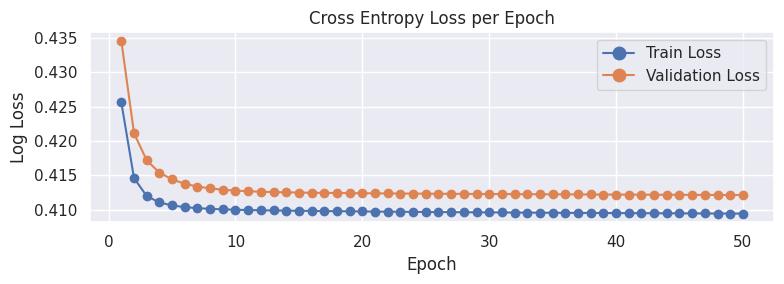

In [42]:
df = train_encoded_2.copy()
X = df.drop('Survived', axis=1)
y = df['Survived']

# splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# model
clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

#epochs
train_losses = []
val_losses = []

epochs = 50
for epoch in range(epochs):
    clf.max_iter = 1
    clf.fit(X_train_scaled, y_train)

    # pred
    y_train_proba = clf.predict_proba(X_train_scaled)
    y_val_proba = clf.predict_proba(X_val_scaled)

    # log loss
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
# graph
plt.figure(figsize=(8, 3))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.title("Cross Entropy Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

conclusions:
Since the mean and median values of 'Age' are fairly close, there isn't a significant change in the model evaluation.

Although completion by median gives us a better AUC value, so we will probably use it for in final model.

### Section 8.1.2 : Feature selection

In this section we will try and eliminate the suspected columns and see how it affects the model evaluation.

In [43]:
#removing 'SibSp' and 'Parch'
train_encoded_3 = train_encoded_1.copy()
train_encoded_3.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [44]:
#splitting for temporary train and validation

X_3 = train_encoded_3.drop('Survived', axis=1)
y_3 = train_encoded_3['Survived']

temp_train_3, temp_val_3, y_train_3, y_val_3 = train_test_split(
    X_3, y_3, test_size=0.2, random_state=42, stratify=y_3
)

In [45]:
#Normalizing the relevant columns

X_train_scaled_3 = temp_train_3.copy()
X_val_scaled_3 = temp_val_3.copy()

num_cols = ['Age', 'Fare']

scaler = StandardScaler()
X_train_scaled_3[num_cols] = scaler.fit_transform(temp_train_3[num_cols])
X_val_scaled_3[num_cols] = scaler.transform(temp_val_3[num_cols])

In [46]:
# running the model

#creating the model
log_model_3 = LogisticRegression(max_iter=1000, solver='liblinear')

#training
log_model_3.fit(temp_train_3, y_train_3)

LogisticRegression(max_iter=1000, solver='liblinear')

In [47]:
#prediction

y_pred_3 = log_model_3.predict(temp_val_3)
y_proba_3 = log_model_3.predict_proba(temp_val_3)[:, 1]

y_train_pred_3 = log_model_3.predict(temp_train_3)

Train Accuracy: 0.8158
Validation Accuracy: 0.8090
Train Cross Entropy: 0.4273
Validation Cross Entropy: 0.4362
AUC: 0.8621

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.77      0.71      0.74        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



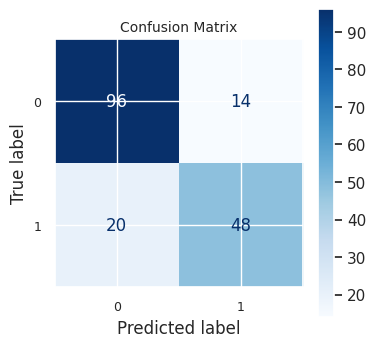

In [48]:
#KPI

#accuracy

train_accuracy3 = accuracy_score(y_train_3, y_train_pred_3)
val_accuracy3 = accuracy_score(y_val_3, y_pred_3)

print(f"Train Accuracy: {train_accuracy3:.4f}")
print(f"Validation Accuracy: {val_accuracy3:.4f}")

# Cross Entropy (Log Loss)
ce_train3 = log_loss(y_train_3, log_model_3.predict_proba(temp_train_3))
ce_val3 = log_loss(y_val_3, y_proba_3)

print(f"Train Cross Entropy: {ce_train3:.4f}")
print(f"Validation Cross Entropy: {ce_val3:.4f}")

# AUC
auc3 = roc_auc_score(y_val_3, y_proba_3)
print(f"AUC: {auc3:.4f}")

print("\nClassification Report:")
print(classification_report(y_val_3, y_pred_3))

#confusion_matrix
cm3 = confusion_matrix(y_val_3, y_pred_3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=log_model_3.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp3.plot(cmap='Blues', ax=ax)

plt.title("Confusion Matrix", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

  Reducing this information did not help the model.
  We will further investigate.

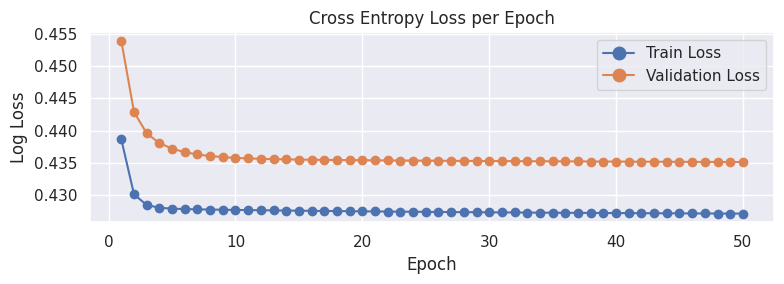

In [49]:
df = train_encoded_3.copy()
X = df.drop('Survived', axis=1)
y = df['Survived']

# splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#normalizing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# model
clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

#epochs
train_losses = []
val_losses = []

epochs = 50
for epoch in range(epochs):
    clf.max_iter = 1
    clf.fit(X_train_scaled, y_train)

    # pred
    y_train_proba = clf.predict_proba(X_train_scaled)
    y_val_proba = clf.predict_proba(X_val_scaled)

    # log loss
    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
# graph
plt.figure(figsize=(8, 3))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.title("Cross Entropy Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Drastic change in loss value (further confirmation for keeping these features).

### Section 8.1.3 : Hyper parameters tuning

In [50]:
encoded_test_df4 = train_encoded_1.copy()

#splitting
X4 = encoded_test_df4.drop('Survived', axis=1)
y4 = encoded_test_df4['Survived']

X_train4, X_val4, y_train4, y_val4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y4)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

#chosen parameters
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__penalty': ['l2'],
    'logreg__class_weight': [None, 'balanced']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train4, y_train4)

#result
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

#predictions
y_pred4 = grid.predict(X_val4)
acc4 = accuracy_score(y_val4, y_pred4)
print(f"Validation accuracy (with best model): {acc4:.4f}")

Best parameters: {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Best cross-validation accuracy: 0.8228
Validation accuracy (with best model): 0.8258


# Section 9 : Comparing  SGDClassifier, logisticRegression, and MLP Models

In [51]:
encoded_test_df5 = train_encoded_1.copy()

#splitting

X5 = encoded_test_df5.drop('Survived', axis=1)
y5 = encoded_test_df5['Survived']

X_train5, X_val5, y_train5, y_val5 = train_test_split(X5, y5, test_size=0.2, random_state=42, stratify=y5)

#models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SGD Classifier": SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

#training

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train5, y_train5)

    y_pred_val = model.predict(X_val5)
    y_proba_val = model.predict_proba(X_val5)[:, 1]

    acc = accuracy_score(y_val5, y_pred_val)
    ce = log_loss(y_val5, y_proba_val)
    auc = roc_auc_score(y_val5, y_proba_val)

    results[name] = {
        "Accuracy": acc,
        "Cross Entropy": ce,
        "AUC": auc
    }


results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="AUC", ascending=False)
display(results_df)


Training Logistic Regression...
Training SGD Classifier...
Training MLP Classifier...


,Accuracy,Cross Entropy,AUC
Logistic Regression,0.820225,0.412462,0.872527
MLP Classifier,0.820225,0.481858,0.847126
SGD Classifier,0.640449,12.843380,0.659492


As we can see, Logistic Regression gives us the best results, thefore will be used in the final model.

# Section 10 : preparing the final data by our conclusions

In [52]:
#combinig the original test and train

test_df_f['Survived'] = pd.NA

combined_df = pd.concat([train_df_f, test_df_f], ignore_index=True)


In [53]:
#feature engineering

#creating 'title' column

combined_df['Title'] = combined_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

combined_df['Title'] = combined_df['Title'].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

combined_df['Title'] = combined_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')

In [54]:
#creating 'is_minor' column

combined_df['is_minor'] = (combined_df['Age'] <= 16).astype(int)

In [55]:
#creating 'is_alone' column
combined_df['FamilyMembers'] = combined_df['SibSp'] + combined_df['Parch']

combined_df['is_alone'] = (combined_df['FamilyMembers'] == 0).astype(int)
combined_df.drop('FamilyMembers', axis=1, inplace=True)

In [56]:
#Completion of 'Age' by median
combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].median())

In [57]:
combined_df.isna().sum()[combined_df.isna().sum() > 0]

,0
Survived,418
Fare,1
Cabin,1014
Embarked,2


In [58]:
#handaling the few missing values of 'Fare' by mean and 'Embarked' by common

combined_df['Fare'] = combined_df['Fare'].fillna(combined_df['Fare'].mean())
combined_df = combined_df.dropna(subset=['Embarked'])

In [59]:
#cleaning the data as concluded

combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Section 11 : Final model

In [60]:
#one hot encoding
combined_df_encoded = pd.get_dummies(combined_df,
                               columns=['Sex', 'Embarked', 'Title', 'Pclass', 'is_minor', 'is_alone'],
                               drop_first=False)

In [61]:
#Normalizing the relevant columns

cols_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()

combined_df_encoded[cols_to_scale] = scaler.fit_transform(combined_df_encoded[cols_to_scale])

In [62]:
#splitting for train and test

train_encoded = combined_df_encoded.iloc[:len(train_df)].copy()
test_encoded = combined_df_encoded.iloc[len(train_df):].copy()

X_train = train_encoded.drop('Survived', axis=1)
y_train = train_encoded['Survived']

X_test = test_encoded.drop('Survived', axis=1)
y_train = y_train.astype(int)


In [63]:
#creating the model

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [64]:
#prediction

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

Accuracy: 0.8335
Cross Entropy: 0.4085
AUC: 0.8741

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.80      0.75      0.78       340

    accuracy                           0.83       889
   macro avg       0.83      0.82      0.82       889
weighted avg       0.83      0.83      0.83       889



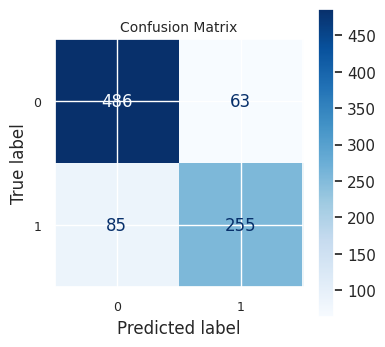

In [65]:
#KPI

#accuracy

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {train_accuracy:.4f}")

# Cross Entropy (Log Loss)
ce_train = log_loss(y_train, y_train_proba)
print(f"Cross Entropy: {ce_train:.4f}")

# AUC
auc = roc_auc_score(y_train, y_train_proba)
print(f"AUC: {auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(cmap='Blues', ax=ax)

plt.title("Confusion Matrix", fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()



# Section 12 : Submission

In [66]:
#pred
y_test_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_df_f['PassengerId'],
    'Survived': y_test_pred.astype(int)
})

submission.to_csv('/content/drive/MyDrive/titanic ML/submission.csv', index=False)


Leader board position & score

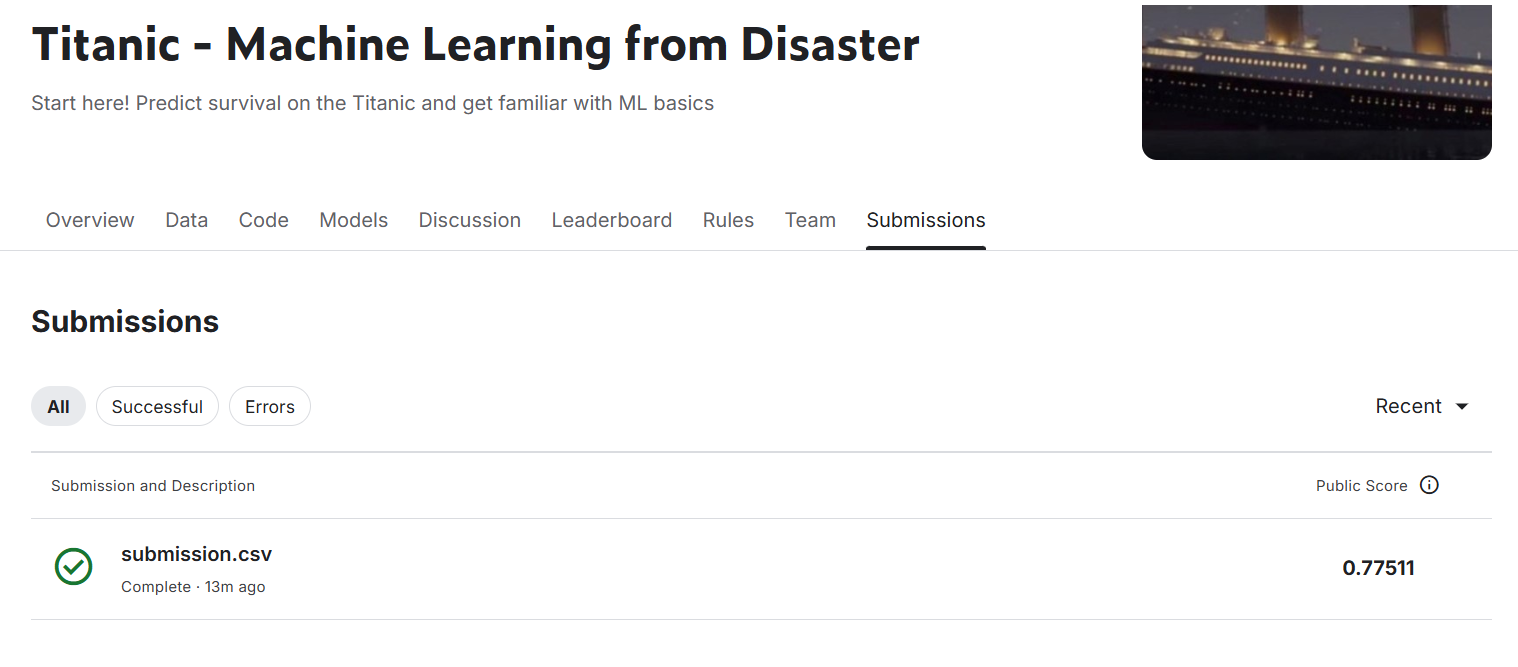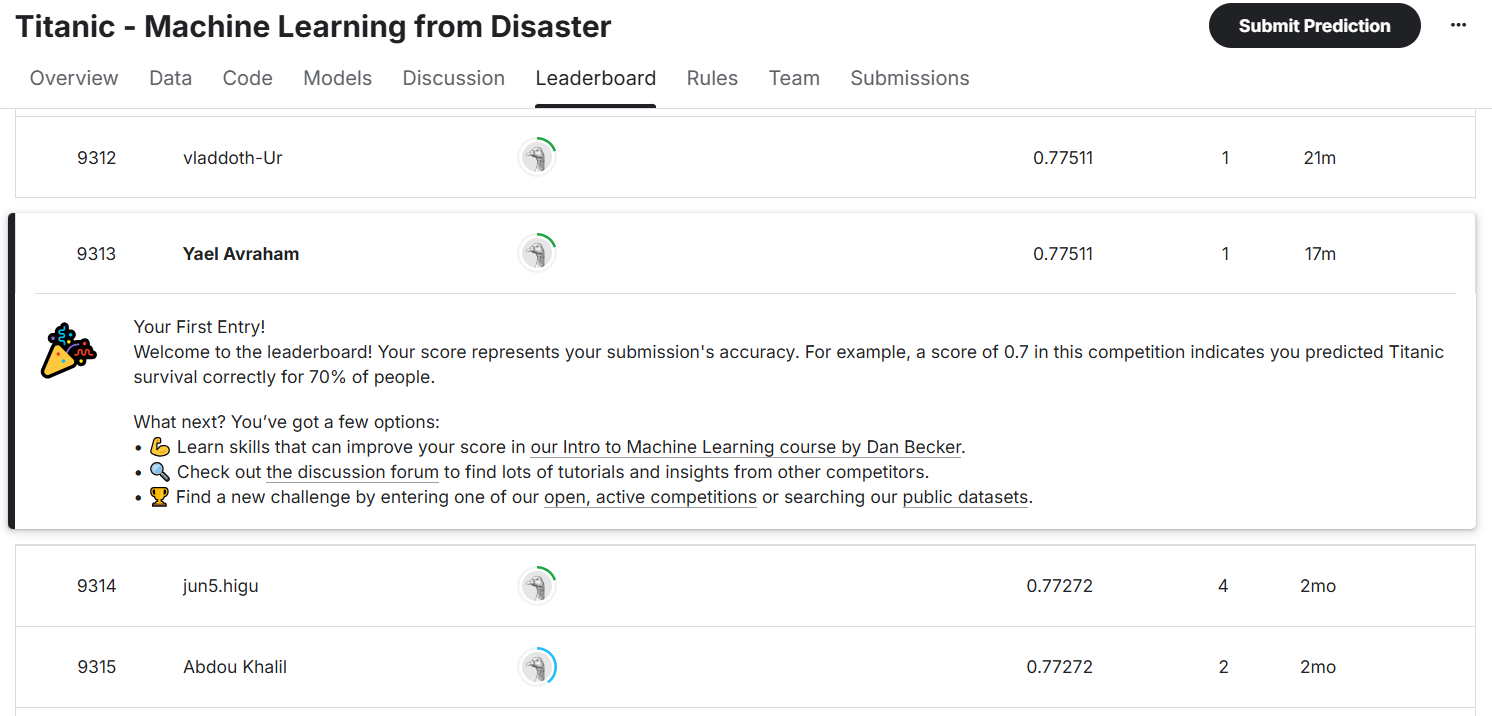

# Section 13 : Summary

In this project we aimed to predict whether a passenger survived in the titanic or not based on limited features.
We began with data investigating and preprocessing, trying to get the most out of the giving data.
We evaluated the model by KPI's, Cross entropy and AUC, and compared a few models.


What worked well:
Data cleaning and preprocessing went well since it was well practiced.
Feature engineering which helped the model drastically.
Comparing multiple models which helped identify the best one.

What Didn't Work So Well:
Trying to eliminate features because it didn't help the model, on the contrary, adding featues was very helpful.
Also we tried to do feature engineering fot 'Ticket' and it failed.

# Section 14 : Resources

We used and got insparation from multiple resources :

Notebook by our lecturer Asaf foox -

https://colab.research.google.com/drive/1N987KadnoIzEvuQvNrORjA43s70qEA8D?usp=sharing

Notebook by Ken Jee -

https://www.kaggle.com/code/kenjee/titanic-project-example#Data-Preprocessing-for-Model

kaggle website -

https://www.kaggle.com/

kaggle 'Titanic - Machine Learning from Disaster' competition -

https://www.kaggle.com/competitions/titanic/overview
